# Some Plotting Examples

In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8) # (w, h) set size of plot

## Simple Plot

Text(-40, 60, 'Intersection')

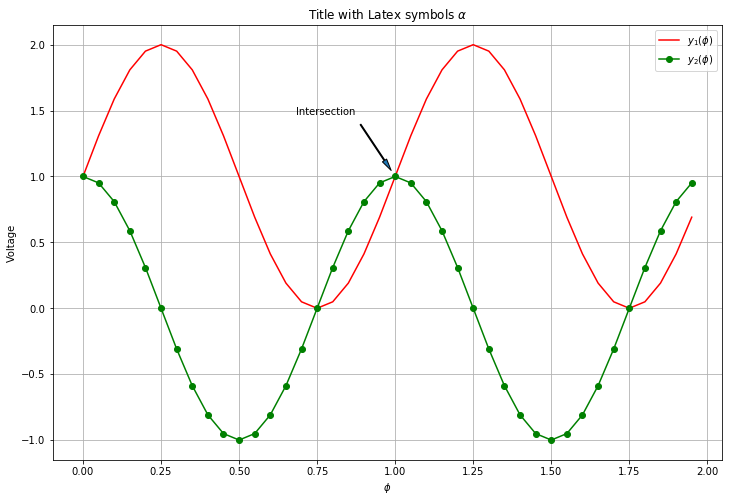

In [20]:
t = np.arange(0.0, 2.0, 0.05)
s1 = 1 + np.sin(2 * np.pi * t)
s2 = np.cos(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s1, '-r', t, s2, '-go')

ax.set(xlabel=r'$\phi$', ylabel=r'Voltage',
       title=r'Title with Latex symbols $\alpha$')
ax.grid()
ax.legend([r"$y_1(\phi)$", r"$y_2(\phi)$"])

ax.annotate('Intersection',
            xy=(1, 1), xycoords='data',
            xytext=(-40, 60), textcoords='offset points',
            arrowprops=dict(shrink=0.1, width = 1, headwidth=5),
            horizontalalignment='right', verticalalignment='bottom')

## Subplots

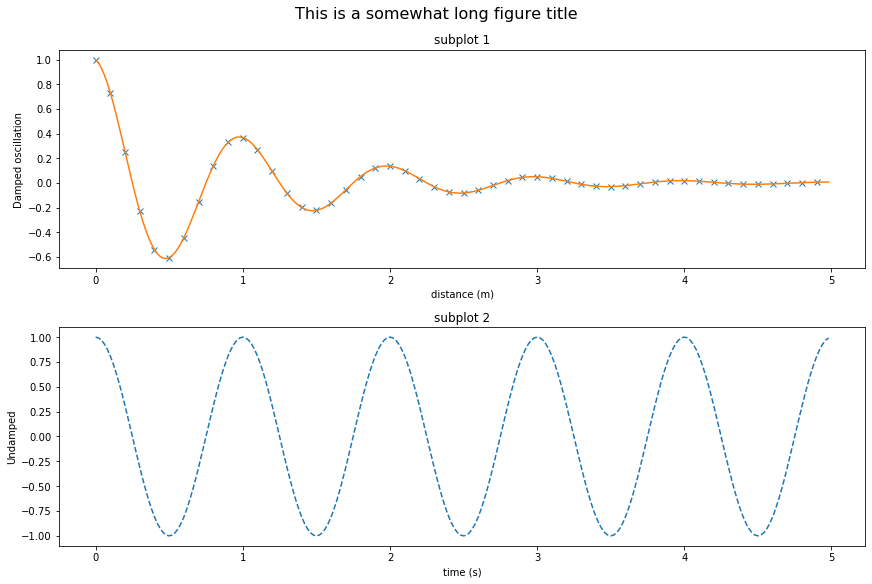

In [21]:
def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# notice the clever trick of ploting a dense line and less dense markers in top!
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t1, f(t1), 'x', t2, f(t2), '-')
axs[0].set_title('subplot 1')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Damped oscillation')
axs[0].grid()
fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(t2, np.cos(2*np.pi*t2), '--')
axs[1].set_xlabel('time (s)')
axs[1].set_title('subplot 2')
axs[1].set_ylabel('Undamped')
axs[0].grid()

## Polar Plot

Text(0.5, 1.05, 'A line plot on a polar axis')

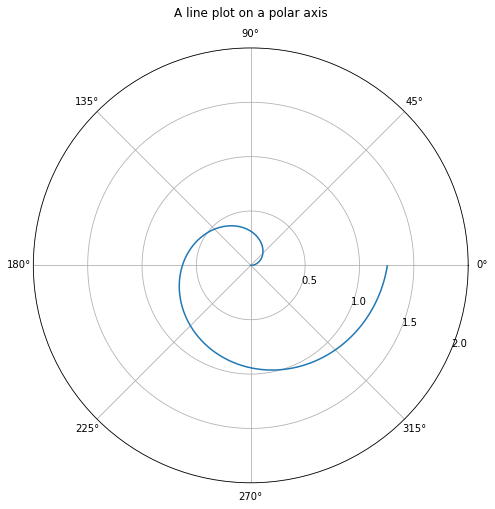

In [22]:
#r = np.arange(0, 2, 0.01)
#theta = 2 * np.pi * r

theta = np.arange(0, 2*np.pi, 0.01)
r = theta / 5

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')

## Histogram

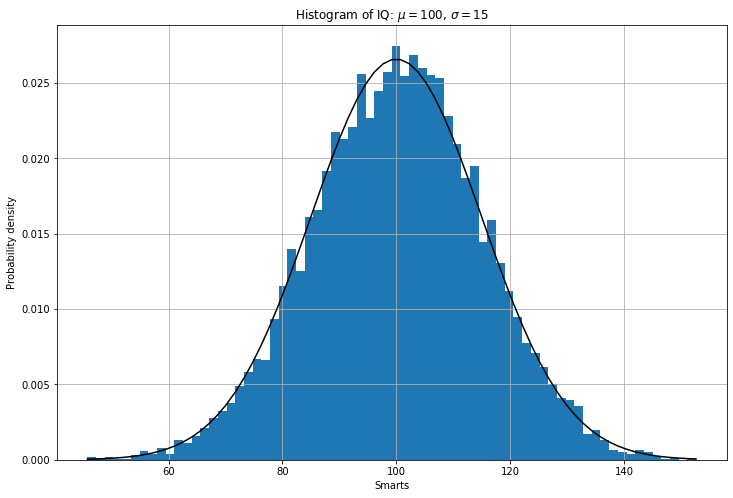

In [23]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 70

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1) # density=1 yields a pdf

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '-k')

ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
ax.grid()

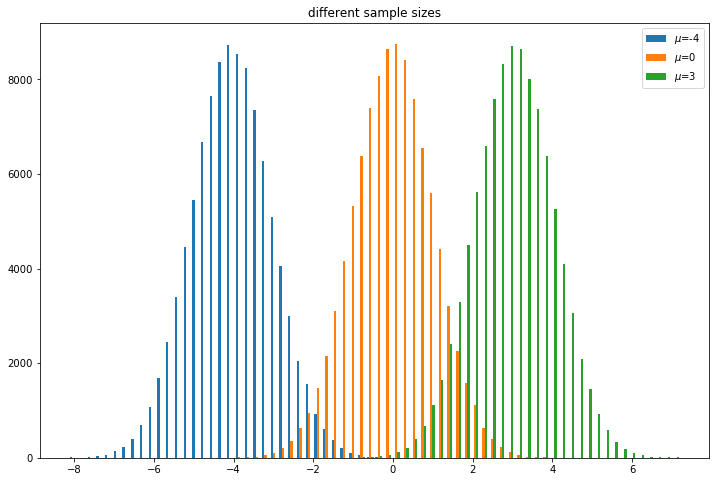

In [24]:
x_multi = [mu + np.random.randn(100000) for mu in [-4,0,3]]

fig, ax = plt.subplots()

ax.hist(x_multi, num_bins, histtype='bar')
ax.set_title('different sample sizes')
ax.legend([r"$\mu$=-4", r"$\mu$=0", r"$\mu$=3"])

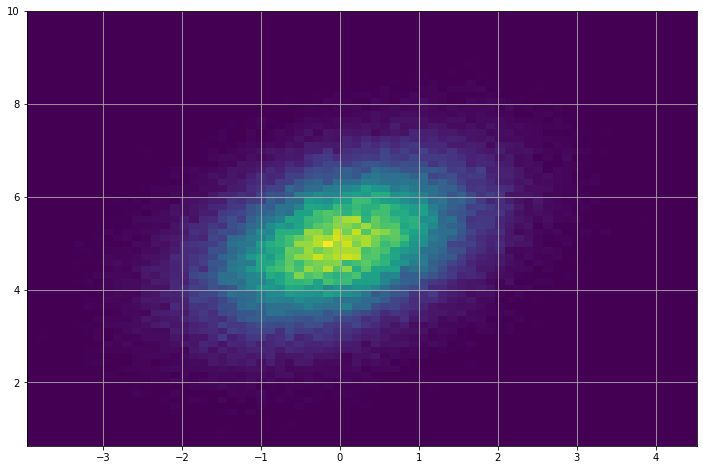

In [25]:
# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(100000)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots()

# We can set the number of bins with the `bins` kwarg
axs.hist2d(x,y, bins=num_bins)
axs.grid()

## Scatterplots

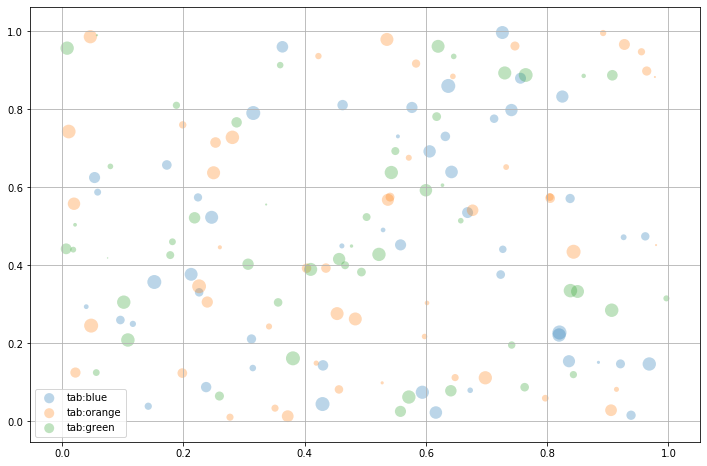

In [26]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 50
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

## Contour Plots

Text(0.5, 1.0, 'Simplest default with labels')

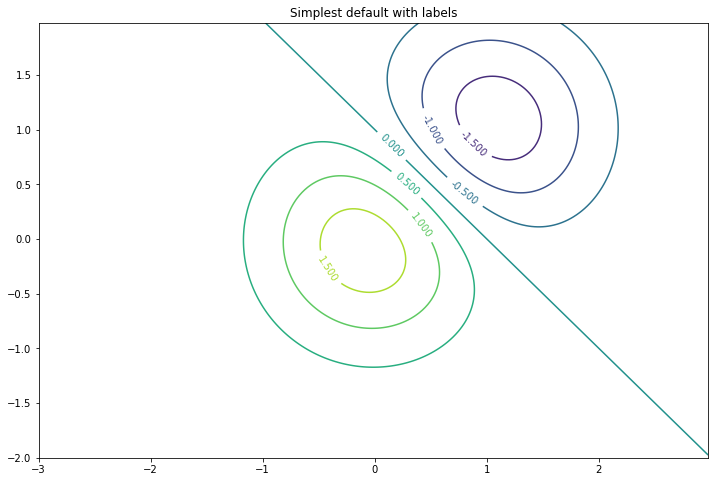

In [27]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')